##Churn - EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Churn"
COLAB = 'google.colab' in sys.modules
DEBUG = False
SEED = 666

In [4]:
if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

##Load Dataset

In [5]:
df = pd.read_pickle(f"{ROOT}/data/data.pkl")
print(df.shape)
df.head()

(7032, 21)


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##EDA - First pass
* Look at target 
* For each numerical variable, describe, histogram/barplot
* For each categorical variable, value_counts, countplot

##Target

Target is categorical so this is a binary classification problem. It is unbalanced so the train test split should be stratified, and using accuracy as a metric is not ideal (a dumb classifier will score 73%)

In [6]:
target = "Churn"
df[target].dtype
df[target].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CustomerID        7032 non-null   int64   
 1   Gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   Tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

###Gender

Male      3549
Female    3483
Name: Gender, dtype: int64

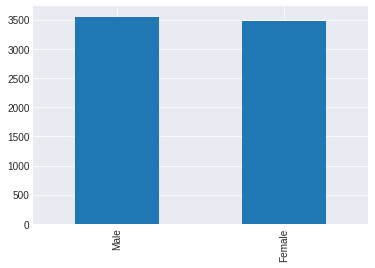

###SeniorCitizen

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

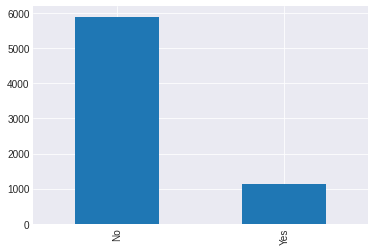

###Partner

No     3639
Yes    3393
Name: Partner, dtype: int64

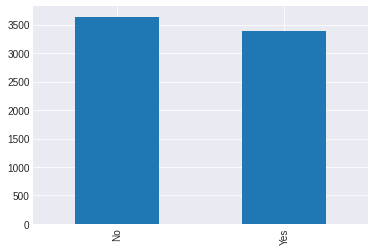

###Dependents

No     4933
Yes    2099
Name: Dependents, dtype: int64

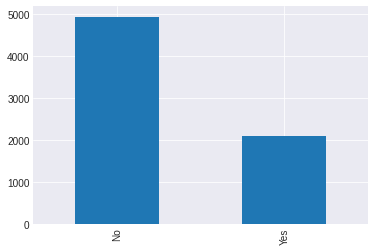

###PhoneService

Yes    6352
No      680
Name: PhoneService, dtype: int64

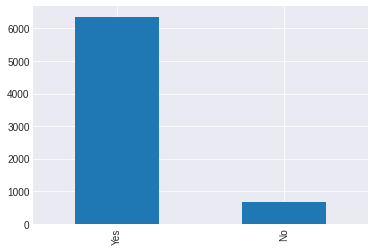

###MultipleLines

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

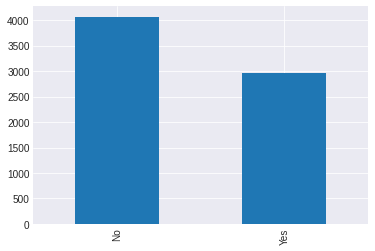

###InternetService

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

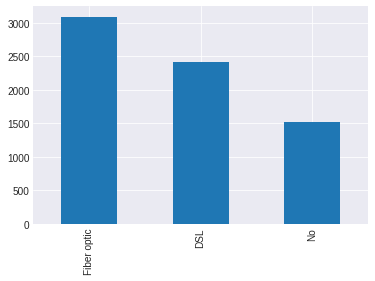

###OnlineSecurity

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

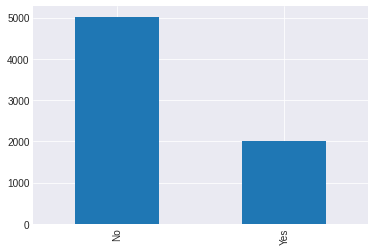

###OnlineBackup

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

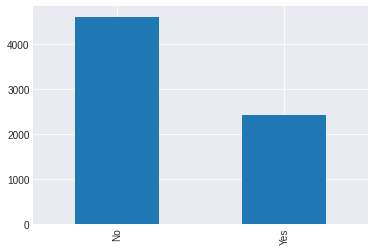

###DeviceProtection

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

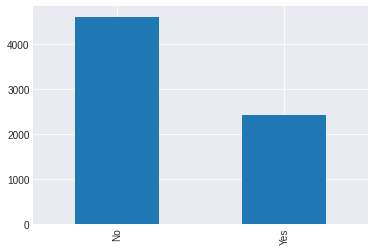

###TechSupport

No     4992
Yes    2040
Name: TechSupport, dtype: int64

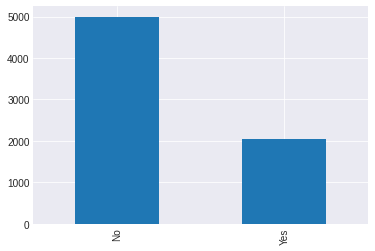

###StreamingTV

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

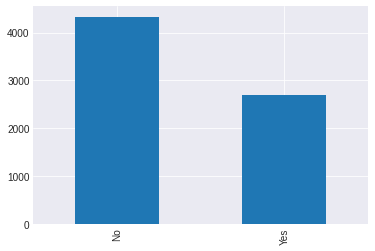

###StreamingMovies

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

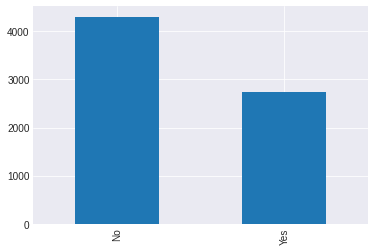

###Contract

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

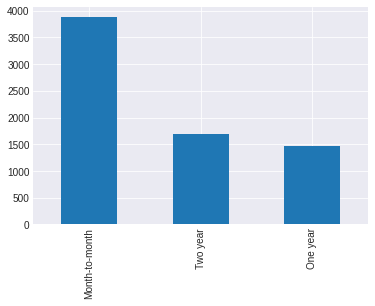

###PaperlessBilling

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

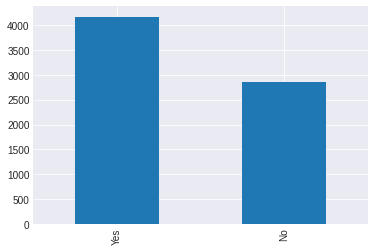

###PaymentMethod

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

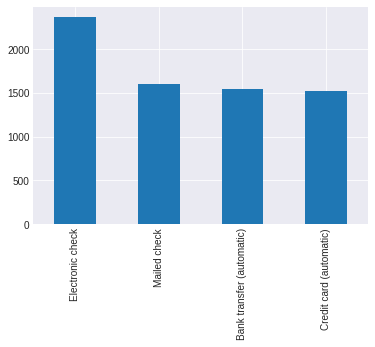

###Churn

No     5163
Yes    1869
Name: Churn, dtype: int64

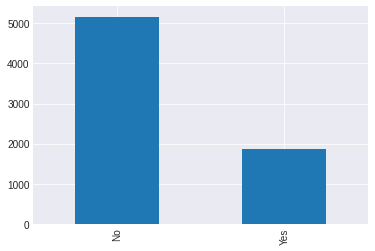

In [8]:
for c in df.select_dtypes('category'):
  display(Markdown(f"###{c}"))
  display(df[c].value_counts())
  df[c].value_counts().plot(kind="bar")
  plt.show()

All categorical variables appear usable without change.

"usable" good number category levels (2-6), and all level are adequatly represented.

###CustomerID

count    7032.000000
mean     3522.562144
std      2032.832448
min         1.000000
25%      1763.750000
50%      3522.500000
75%      5283.250000
max      7043.000000
Name: CustomerID, dtype: float64

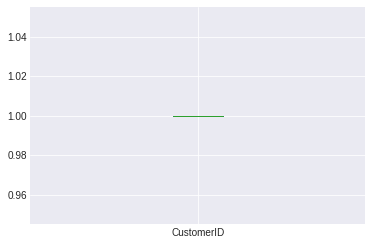

###Tenure

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

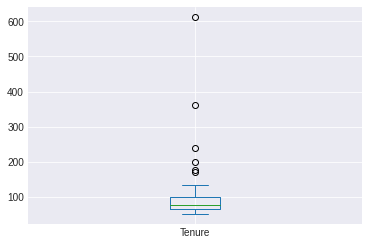

###MonthlyCharges

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

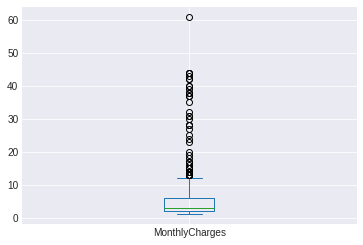

###TotalCharges

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

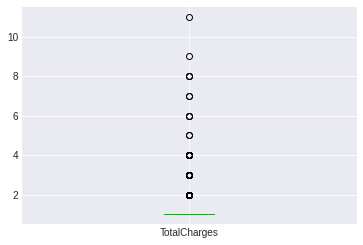

In [9]:
for c in df.select_dtypes(['int', 'float']):
  display(Markdown(f"###{c}"))
  display(df[c].describe())
  df[c].value_counts().plot(kind="box")
  plt.show()

Numericals variables are all reasonably symmetric so no need for transformation. No outliers shown in bloxplot.